<a href="https://colab.research.google.com/github/sury1999/Data-Science-Projects/blob/main/Roundhacks_hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip3 install statsmodels==0.10.0rc2 --pre --user
from sklearn.metrics import mean_squared_error as mse

In [60]:
#Setting figure size
plt.rc('figure', figsize=(10, 5))

In [61]:
tb1 = pd.read_csv('/content/sample_submission.csv')
tb1.head()

,prediction
0,5.57
1,5.57
2,5.57
3,5.57
4,5.57


In [62]:
test_series = pd.read_csv('/content/new_test.csv',
                          parse_dates=['date'],
                          index_col=['date'])
len(test_series)

3561

In [63]:
df = pd.read_csv('/content/new_train.csv',
                parse_dates=['date'],
                index_col=['date'])
df.head()

,temp
date,
1980-01-01,4.16
1980-02-01,4.06
1980-03-01,7.12
1980-04-01,9.23
1980-05-01,3.20


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11323 entries, 1980-01-01 to 2010-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    11323 non-null  float64
dtypes: float64(1)
memory usage: 176.9 KB


In [65]:
df.describe()

,temp
count,11323.000000
mean,15.573259
std,7.877191
min,-5.110000
25%,8.390000
50%,15.990000
75%,22.055000
max,32.390000


In [66]:
months = df.index.month
df.groupby(months)['temp'].mean()


date
1      8.905016
2      9.935354
3     11.923642
4     15.267731
5     17.630000
6     19.574720
7     21.925369
8     22.311811
9     19.477602
10    16.330676
11    13.062613
12    10.200083
Name: temp, dtype: float64

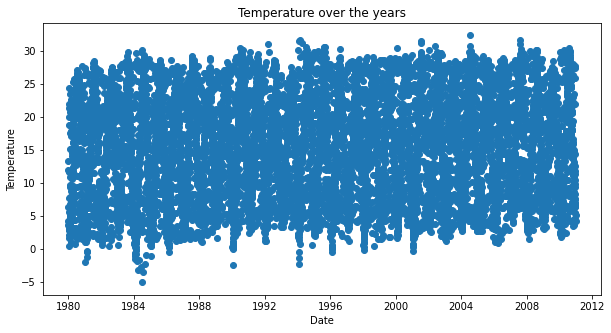

In [67]:
plt.scatter(df.index,df['temp'])
plt.title('Temperature over the years')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

In [68]:
y = df.groupby(df.index.year)['temp'].mean()

In [69]:
n = pd.Series(i for i in range(1980,2011))


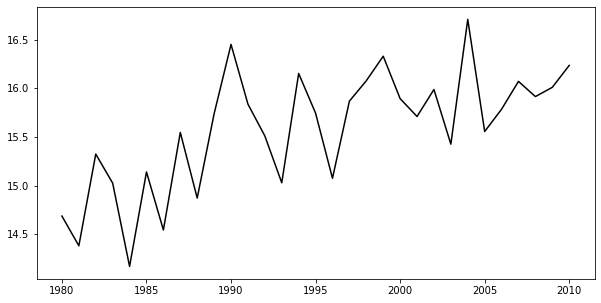

In [70]:
plt.plot(n, y, label='train_data',color='black')
plt.show()

In [71]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [72]:
olum=df['temp'].copy()
olum.index=df.index
olum=pd.DataFrame(olum)
olum.head()

,temp
date,
1980-01-01,4.16
1980-02-01,4.06
1980-03-01,7.12
1980-04-01,9.23
1980-05-01,3.20


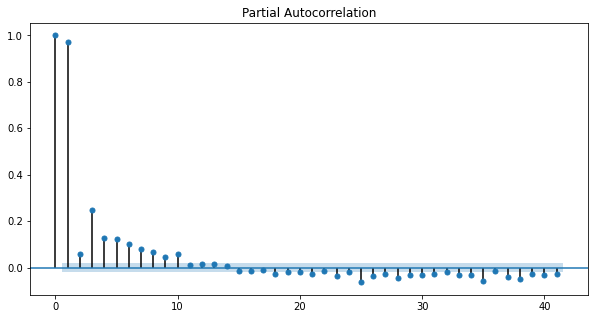

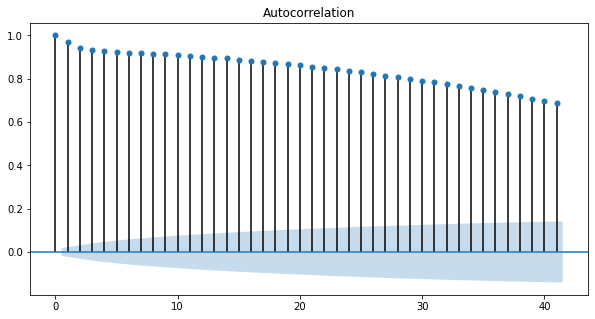

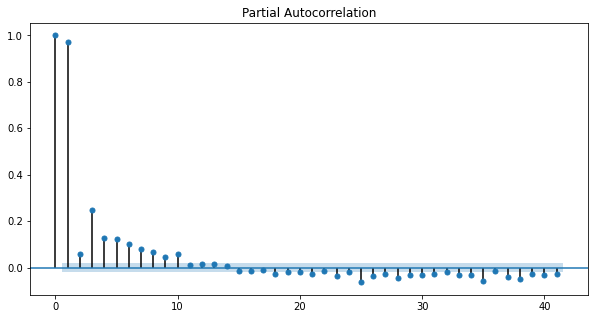

In [73]:
plot_acf(olum)
plot_pacf(olum)

In [74]:
from statsmodels.tsa.ar_model import AR
model2=AR(olum).fit()
model2.aic

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


1.1546067210800457

In [75]:
model = AR(olum)  # use time span of 1 year for lagging
trained_model = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [86]:
predictions = trained_model.predict(start=len(olum), 
                                    end=len(olum) + len(test_series) - 1)
predictions.columns=["predictions"]

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [89]:
predictions.to_csv('answers.csv',index=False)